In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
import math
from scipy import integrate
from numpy import diff
from scipy.integrate import solve_ivp

In [2]:
plt.rc('text', usetex = True)
plt.rc('font', **{'family' : "sans-serif"})
params = {'text.latex.preamble' : [r'\usepackage{amssymb}']}   # amssymb
plt.rcParams.update(params)
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

In [3]:
def funciones(xi,y, sigma, n, h):
    psi_ , eta_, psi1_, eta1_ = y
    dydxi = [h*(eta_ + sigma * xi**(3)*psi_**(n+1))*(1 + sigma*psi_)/xi/(2*(n+1)*sigma*eta_ - xi ) 
           ,xi**(2) * psi_**(n) 
           ,h*(((eta1_ + 3 * sigma * xi**(2) * psi_**(n+1) + sigma * xi**(3) * (n+1) * psi_**(n) * psi1_) * (sigma * psi_ + 1) / xi / (2 * (n+1) * sigma * eta_ - xi)) + (sigma * psi1_ * (eta_ + sigma * xi**(3) * psi_**(n+1)) / xi / (2 * (n+1) * sigma * eta_ - xi)) - ((1 + sigma * psi_) * (eta_ + sigma * xi**(3) * psi_**(n+1)) / xi**(2) / (2 * (n+1) * sigma * eta_ - xi) ) - ((1 + sigma * psi_) * (eta_ + sigma * xi**(3) * psi_**(n+1)) * (2 * (n+1) * sigma * eta1_ - 1) / xi / ((2 * (n+1) * sigma * eta_ - xi)**(2))))           
           ,2 * xi * psi_**(n) + xi**(2) * n * psi_**(n-1) * psi1_]
    return dydxi

In [4]:
c = 2.997*10**(8)               # Speed of light in SI units
G = 6.673*10**(-11)             # Gravitational Constant in SI units
Msun = 1.989*10**(30)           # 1 Solar Mass in SI units

In [5]:
                                               ## List of parameters ##
    
#C
Lista_C = [-0.25,-0.15,-0.1,-0.05,-0.025,0.0,0.025,0.05,0.1,0.15,0.25]
# Lista_C = [-0.1,-0.05,-0.025,0.025,0.05,0.1]
print('C interval: ',end='')
print(*Lista_C, sep=', ')

# n 
# Lista_n = [0.5,1.0,1.5,2.0]
Lista_n = [0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0]
print('n interval: ',end='')                                                        # n to Final n
print(*Lista_n, sep=', ')

# Sigma = ratio between central pressure and central density
# Lista_sigma = [0.05,0.1,0.15,0.2]
Lista_sigma = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8]
print('\u03c3 interval: ',end='')
print(*Lista_sigma, sep=', ')

Number_of_models = len(Lista_C)*len(Lista_n)*len(Lista_sigma)
print('Number of models: ', Number_of_models)

rho_c = 2.5*10**(18)

C interval: -0.25, -0.15, -0.1, -0.05, -0.025, 0.0, 0.025, 0.05, 0.1, 0.15, 0.25
n interval: 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0
σ interval: 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8
Number of models:  1408


In [6]:
ListaModelos = []                                        # Container for all models 

for i in range(len(Lista_C)):
    
    ListaModelos.append([])                              # Container for n
    
    for j in range(len(Lista_n)):
        
        ListaModelos[i].append([])                       # Container for C
        
        for k in range(len(Lista_sigma)):
            
            ListaModelos[i][j].append([])                # Contenedor para sigma

In [7]:
%%time

contador = 0

for i in range(len(Lista_C)):
    
    C = Lista_C[i]
    h = 1 - 2*C
    
    for j in range(len(Lista_n)):
        
        n = Lista_n[j]
        
        for k in range(len(Lista_sigma)):
            
            sigma = Lista_sigma[k]
                    
            K = sigma*c**(2)/rho_c**(1/n)      # k**(n) en m**(3)/kg
                     
            # Condiciones iniciales
            Psi0 = 1.0
            Eta0 = 0.0
            Psi10 = 0.0
            Eta10 = 0.0
            
            y0 = [Psi0,Eta0,Psi10,Eta10]
            
            
            def stop_condition(xi,y,sigma,n,h):
                return y[0] - 10**-14
            
            stop_condition.terminal = True
            
            xi0 = 10**(-14)
            ximax = 10000
    
            xi_span = (xi0,ximax)
        
            soluciones = solve_ivp(funciones,xi_span,y0,method='RK45',events=stop_condition,
                                   args=(sigma,n,h))
            
            if soluciones.status == 0:
                ListaModelos[i][j][k].append(1)
                ListaModelos[i][j][k].append(1)
                ListaModelos[i][j][k].append(1)
                ListaModelos[i][j][k].append(1)
                ListaModelos[i][j][k].append(1)
                ListaModelos[i][j][k].append(1)
                ListaModelos[i][j][k].append(1)
                ListaModelos[i][j][k].append(1)
                ListaModelos[i][j][k].append(1)
                ListaModelos[i][j][k].append(1)
                ListaModelos[i][j][k].append(1)
                ListaModelos[i][j][k].append(1)
                print('Insufficient integration interval xi, please increase it. Parameters: ',
                      'C = %.3f, '%(C),'n = %.1f, '%(n),'\u03c3 = %.2f, '%(sigma))
                contador = contador + 1
                ListaModelos[i][j][k] = len(ListaModelos[i][j][k])
                continue
        
            
            Psi = soluciones.y[0]
            Eta = soluciones.y[1]
            Psi1 = soluciones.y[2]
            Eta1 = soluciones.y[3]
            xi = soluciones.t
            
            
            
            #########################################################################################################
            
            xiNorm = xi/xi[-1]                                       # xi normalized
            
            Densidad = Psi**(n)                                      # Density
            
            Dprima = n*Psi**(n-1)*Psi1                               # Density gradient
            
            m = (c**(2)*sigma*(n+1)/(4*np.pi*rho_c)**(1/3)/G)**(3/2)*Eta/Msun   # Masa en unidades de masa solar
            r = (c**(2)*sigma*(n+1)/4/np.pi/G/rho_c)**(1/2)*xi/1000             # Radio en kilómetros
            mr = 2*sigma*(n+1)*Eta/xi                                           # 2*G*m/c**(2)/r
            
            # Pressure divided by central pressure
            PNorm = Psi**(n+1)
            
            # Tangential pressure
            PTNorm = (C*(n+1)*(Eta + sigma*Psi**(n+1)*xi**(3))/(xi - 2*Eta*sigma*(n+1)))*(Psi**(n) + sigma*Psi**(n+1)) + Psi**(n+1)
            
            # Second derivative of Psi
            Psi11 = h*(((Eta1 + 3*sigma*xi**(2)*Psi**(n+1) + sigma*xi**(3)*(n+1)*Psi**(n)*Psi1)*(sigma*Psi + 1)/xi/(2*(n+1)*sigma*Eta - xi)) + (sigma*Psi1*(Eta + sigma*xi**(3)*Psi**(n+1))/xi/(2*(n+1)*sigma*Eta - xi)) - ((1 + sigma*Psi)*(Eta + sigma*xi**(3)*Psi**(n+1))/xi**(2)/(2*(n+1)*sigma*Eta - xi)) - ((1 + sigma*Psi)*(Eta + sigma*xi**(3)*Psi**(n+1))*(2*(n+1)*sigma*Eta1 - 1)/xi/((2*(n+1)*sigma*Eta - xi)**(2))))
            
            mrprima = sigma*(n+1)*(Eta1/xi - Eta/xi**(2))   # Derivada de m/r
            
            Pprima = (n+1)*Psi**(n)*Psi1
            
            # Tangential pressure gradient
            Ptprima = C*(n+1)*((Eta1 + 3*sigma*xi**(2)*Psi**(n+1) + sigma*(n+1)*xi**(3)*Psi**(n)*Psi1)*(Psi**(n) + sigma*Psi**(n+1))/(xi - 2*Eta*(n+1)*sigma) + (Eta + sigma*xi**(3)*Psi**(n+1))*(n*Psi**(n-1)*Psi1 + sigma*(n+1)*Psi**(n)*Psi1)/(xi - 2*Eta*(n+1)*sigma) - (Eta + sigma*xi**(3)*Psi**(n+1))*(Psi**(n) + sigma*Psi**(n+1))*(1 - 2*Eta1*(n+1)*sigma)/(xi - 2*Eta*(n+1)*sigma)**(2)) + (n+1)*Psi**(n)*Psi1
            
            SEC = (1/sigma)*Densidad - PNorm - 2*PTNorm               # Strong energy condition (SEC)                
            v2r =  sigma*(1 + 1/n)*Psi                      # Sound speed squared
            
            # Tangential sound speed squared
            v2t = sigma*(1 + 1/n)*Psi +  C*sigma*(n+1)*(Eta + sigma*Psi**(n+1)*xi**(3))/(xi - 2*Eta*sigma*(n+1))
            
            Gamma = v2r*(Densidad + sigma*PNorm)/PNorm/sigma
            
            # Cracking: deltaR1: Density, deltaR2: Mass, deltaR3: Pressure, delta R4: Pressure gradient   
            deltaR1 = h*((n+1) * sigma * (Eta + xi**(3) * sigma * Psi**(n+1)) / xi / (xi - 2 * sigma * n * Eta - 2 * sigma * Eta))
            deltaR2 = h*(Psi**(n+1) * xi**(2) * sigma * (n+1) * (1 + sigma * Psi) * (1 + 2 * xi**(2) * sigma * sigma * (n+1) * Psi**(n+1)) / n / Psi1 / ((xi - 2 * Eta * sigma * n - 2 * Eta * sigma)**(2)))
            deltaR3 = h*(sigma * (n+1)**(2) * sigma * Psi * (Eta + xi**(3) * Psi**(n) + 2 * sigma * xi**(3) * Psi**(n+1)) / n / xi / (xi - 2 * sigma * n * Eta - 2 * sigma * Eta))
            deltaR4 = sigma * (n+1) * (n * Psi1**(2) + Psi * Psi11) / n / Psi1
            deltaRPolitropa = deltaR1 + deltaR2 + deltaR3 + deltaR4
            
            # Buoyancy
            Psin11 = n*(Psi**(n-1)*Psi11 + (n-1)*Psi**(n-2)*Psi1**(2))
            
            M = (c**(2)*(n+1)/(4*np.pi)**(1/3)/G)**(3/2)*(k/c**(2))**(n/2)*sigma**((3-n)/2)*Eta[-1]/Msun  # Masa en unidades de masa solar
            
            R = (c**(2)*(n+1)/4/np.pi/G)**(1/2)*(k/c**(2))**(n/2)*sigma**((1-n)/2)*xi[-1]/1000         # Radio en kilómetros
            
            ##########################################################################################################
            
            # Conditions C1, C2 and C3
            
            if any(mr >= 1):
                ListaModelos[i][j][k].append(1)
            else:
                pass
            
            # Condition C4
            
            if any(Densidad < 0) or any(PNorm < 0) or any(PTNorm < 0):
                ListaModelos[i][j][k].append(1)
            else:
                pass
            
            # Condition C5
            
            if any(Dprima > 0) or any (Pprima > 0) or any (Ptprima[round(len(Ptprima)*0.1):] > 0):
                ListaModelos[i][j][k].append(1)
            else:
                pass
            

            # Condition C6
            
            if any(SEC < 0):
                ListaModelos[i][j][k].append(1)
            else:
                pass
            
            # Condition C7
            
            if any(v2r > 1) or any(v2t > 1):
                ListaModelos[i][j][k].append(1)
            else:
                pass
            
            # Condition C8

            if n == 0.5 :
                    
                if C == 0.15 and sigma >= 0.7 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 1/4 and sigma >= 0.425 :
                    ListaModelos[i][j][k].append(1)
                    
                else:
                    pass
                    
            
            elif n == 1.0 :
                
                if C == -0.25 and sigma >= 0.625 :
                    ListaModelos[i][j][k].append(1)
            
                elif C == -0.15 and sigma >= 0.525 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == -0.1 and sigma >= 0.5 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == -0.05 and sigma >= 0.45 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == -0.025 and sigma >= 0.425 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.0 and sigma >= 0.4 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.025 and sigma >= 0.375 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.05 and sigma >= 0.35 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.1 and sigma >= 0.3 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.15 and sigma >= 0.25 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.25 and sigma >= 0.175 :
                    ListaModelos[i][j][k].append(1)     
                else:
                    pass
                    
            
            elif n == 1.5 :
                
                if C == -0.25 and sigma >= 0.25 :
                    ListaModelos[i][j][k].append(1)
            
                elif C == -0.15 and sigma >= 0.225 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == -0.1 and sigma >= 0.2 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == -0.05 and sigma >= 0.2 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == -0.025 and sigma >= 0.175 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.0 and sigma >= 0.175 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.025 and sigma >= 0.175 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.05 and sigma >= 0.15 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.1 and sigma >= 0.125 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.15 and sigma >= 0.125 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.25 :
                    ListaModelos[i][j][k].append(1)     
                else:
                    pass
                    
            
            elif n == 2.0 :
                
                if C == -0.25 and sigma >= 0.1 :
                    ListaModelos[i][j][k].append(1)
            
                elif C == -0.15 and sigma >= 0.1 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == -0.1 and sigma >= 0.1 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == -0.05 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == -0.025 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.0 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.025 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.05 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.1 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.15 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.25 and sigma <= 0.825 :
                    ListaModelos[i][j][k].append(1)     
                else:
                    pass
                    
            
            elif n == 2.5 :
                
                if C == -0.25 :
                    ListaModelos[i][j][k].append(1)
            
                elif C == -0.15 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == -0.1 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == -0.05 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == -0.025 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.0 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.025 and sigma <= 0.825 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.05 and sigma <= 0.8 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.1 and sigma <= 0.7 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.15 and sigma <= 0.625 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.25 and sigma <= 0.45 :
                    ListaModelos[i][j][k].append(1)     
                else:
                    pass
                    
            
            elif n == 3.0 :
                
                if C == -0.25 and sigma <= 0.675 :
                    ListaModelos[i][j][k].append(1)
            
                elif C == -0.15 and sigma <= 0.6 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == -0.1 and sigma <= 0.55 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == -0.05 and sigma <= 0.525 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == -0.025 and sigma <= 0.5 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.0 and sigma <= 0.475 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.025 and sigma <= 0.45 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.05 and sigma <= 0.45 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.1 and (sigma <= 0.4 or sigma >= 0.825) :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.15 and (sigma <= 0.35 or sigma >= 0.7) :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.25 and (sigma <= 0.25 or sigma >= 0.45) :
                    ListaModelos[i][j][k].append(1)     
                else:
                    pass
                    
            
            elif n == 3.5 :
                
                if C == -0.25 and (sigma <= 0.35 or sigma >= 0.475) :
                    ListaModelos[i][j][k].append(1)
            
                elif C == -0.15 and (sigma <= 0.325 or sigma >= 0.4) :
                    ListaModelos[i][j][k].append(1)
                
                elif C == -0.1 and (sigma <= 0.3 or sigma >= 0.375) :
                    ListaModelos[i][j][k].append(1)
                
                elif C == -0.05 and (sigma <= 0.275 or sigma >= 0.35) :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == -0.025 and (sigma <= 0.275 or sigma >= 0.325) :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.0 and (sigma <= 0.25 or sigma >= 0.325) :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.025 and (sigma <= 0.25 or sigma >= 0.3) :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.05 and (sigma <= 0.25 or sigma >= 0.275) :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.1 and (sigma <= 0.225 or sigma >= 0.25) :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.15 and (sigma <= 0.2 or sigma >= 0.225) :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.25 and (sigma <= 0.15 or sigma >= 0.175) :
                    ListaModelos[i][j][k].append(1)     
                else:
                    pass
                    
            
            elif n == 4.0 :
                
                if C == -0.25 and (sigma <= 0.15 or sigma >= 0.2) :
                    ListaModelos[i][j][k].append(1)
            
                elif C == -0.15 and (sigma <= 0.15 or sigma >= 0.175) :
                    ListaModelos[i][j][k].append(1)
                
                elif C == -0.1 and (sigma <= 0.125 or sigma >= 0.175) :
                    ListaModelos[i][j][k].append(1)
                
                elif C == -0.05 and (sigma <= 0.125 or sigma >= 0.15) :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == -0.025 and (sigma <= 0.125 or sigma >= 0.15) :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.0 and (sigma <= 0.125 or sigma >= 0.15) :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.025 and (sigma <= 0.1 or sigma >= 0.15) :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.05 and (sigma <= 0.1 or sigma >= 0.125) :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.1 and (sigma <= 0.1 or sigma >= 0.125) :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.15 and (sigma <= 0.1 or sigma >= 0.375) :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 0.25 and (sigma <= 0.275 or sigma >= 0.5) :
                    ListaModelos[i][j][k].append(1)     
                else:
                    pass
                
            else:
                pass
                    
            
            
            # Condition C8
            
            if any(Gamma < 4/3):
                ListaModelos[i][j][k].append(1)
            else:
                pass
            
            # Condition C9
           
            if any(np.diff(np.sign(deltaRPolitropa[1:])) != 0):
                ListaModelos[i][j][k].append(1)
            else:
                pass

            # Condition C11
            
            if any(Psin11 > 0):
                ListaModelos[i][j][k].append(1)
            else:
                pass
            
            ListaModelos[i][j][k] = len(ListaModelos[i][j][k])

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:107: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:110: RuntimeWarning: invalid 

Insufficient integration interval xi, please increase it. Parameters:  C = -0.250,  n = 3.5,  σ = 0.45, 
Insufficient integration interval xi, please increase it. Parameters:  C = -0.250,  n = 3.5,  σ = 0.50, 
Insufficient integration interval xi, please increase it. Parameters:  C = -0.250,  n = 3.5,  σ = 0.55, 
Insufficient integration interval xi, please increase it. Parameters:  C = -0.250,  n = 3.5,  σ = 0.60, 
Insufficient integration interval xi, please increase it. Parameters:  C = -0.250,  n = 4.0,  σ = 0.20, 
Insufficient integration interval xi, please increase it. Parameters:  C = -0.250,  n = 4.0,  σ = 0.25, 
Insufficient integration interval xi, please increase it. Parameters:  C = -0.250,  n = 4.0,  σ = 0.30, 
Insufficient integration interval xi, please increase it. Parameters:  C = -0.250,  n = 4.0,  σ = 0.35, 
Insufficient integration interval xi, please increase it. Parameters:  C = -0.250,  n = 4.0,  σ = 0.40, 
Insufficient integration interval xi, please increase i

Insufficient integration interval xi, please increase it. Parameters:  C = 0.000,  n = 3.5,  σ = 0.35, 
Insufficient integration interval xi, please increase it. Parameters:  C = 0.000,  n = 3.5,  σ = 0.40, 
Insufficient integration interval xi, please increase it. Parameters:  C = 0.000,  n = 4.0,  σ = 0.15, 
Insufficient integration interval xi, please increase it. Parameters:  C = 0.000,  n = 4.0,  σ = 0.20, 
Insufficient integration interval xi, please increase it. Parameters:  C = 0.000,  n = 4.0,  σ = 0.25, 
Insufficient integration interval xi, please increase it. Parameters:  C = 0.000,  n = 4.0,  σ = 0.30, 
Insufficient integration interval xi, please increase it. Parameters:  C = 0.000,  n = 4.0,  σ = 0.35, 
Insufficient integration interval xi, please increase it. Parameters:  C = 0.000,  n = 4.0,  σ = 0.40, 
Insufficient integration interval xi, please increase it. Parameters:  C = 0.000,  n = 4.0,  σ = 0.45, 
Insufficient integration interval xi, please increase it. Parame

Insufficient integration interval xi, please increase it. Parameters:  C = 0.250,  n = 3.5,  σ = 0.80, 
Insufficient integration interval xi, please increase it. Parameters:  C = 0.250,  n = 4.0,  σ = 0.10, 
Insufficient integration interval xi, please increase it. Parameters:  C = 0.250,  n = 4.0,  σ = 0.15, 
Insufficient integration interval xi, please increase it. Parameters:  C = 0.250,  n = 4.0,  σ = 0.20, 
Insufficient integration interval xi, please increase it. Parameters:  C = 0.250,  n = 4.0,  σ = 0.25, 
Insufficient integration interval xi, please increase it. Parameters:  C = 0.250,  n = 4.0,  σ = 0.30, 
Insufficient integration interval xi, please increase it. Parameters:  C = 0.250,  n = 4.0,  σ = 0.35, 
Insufficient integration interval xi, please increase it. Parameters:  C = 0.250,  n = 4.0,  σ = 0.40, 
Insufficient integration interval xi, please increase it. Parameters:  C = 0.250,  n = 4.0,  σ = 0.45, 
Insufficient integration interval xi, please increase it. Parame

In [8]:
print(contador, ' out of ', Number_of_models, ' are NOT integrable')

176  out of  1408  are NOT integrable


In [9]:
C = [ListaModelos[i] for i in range(len(Lista_C))]
dic = {0:('red','o'),1:('blue','s'),2:('green','d'),3:('darkorange','^'),4:('purple','*'),12:('gray','X')}
C = [[[dic.get(val,('white','o')) for val in sublist2] for sublist2 in sublist1] for sublist1 in C]

In [10]:
legend_elements = [Line2D([0],[0],marker='o',color='w',label='9',markerfacecolor='red',markersize=6),
                   Line2D([0],[0],marker='s',color='w',label='8',markerfacecolor='blue',markersize=6),
                   Line2D([0],[0],marker='d',color='w',label='7',markerfacecolor='green',markersize=7),
                   Line2D([0],[0],marker='^',color='w',label='6',markerfacecolor='darkorange',markersize=8),
                   Line2D([0],[0],marker='*',color='w',label='5',markerfacecolor='purple',markersize=11),
                   Line2D([0],[0],marker='X',color='w',label='No boundary',markerfacecolor='gray',markersize=7)]

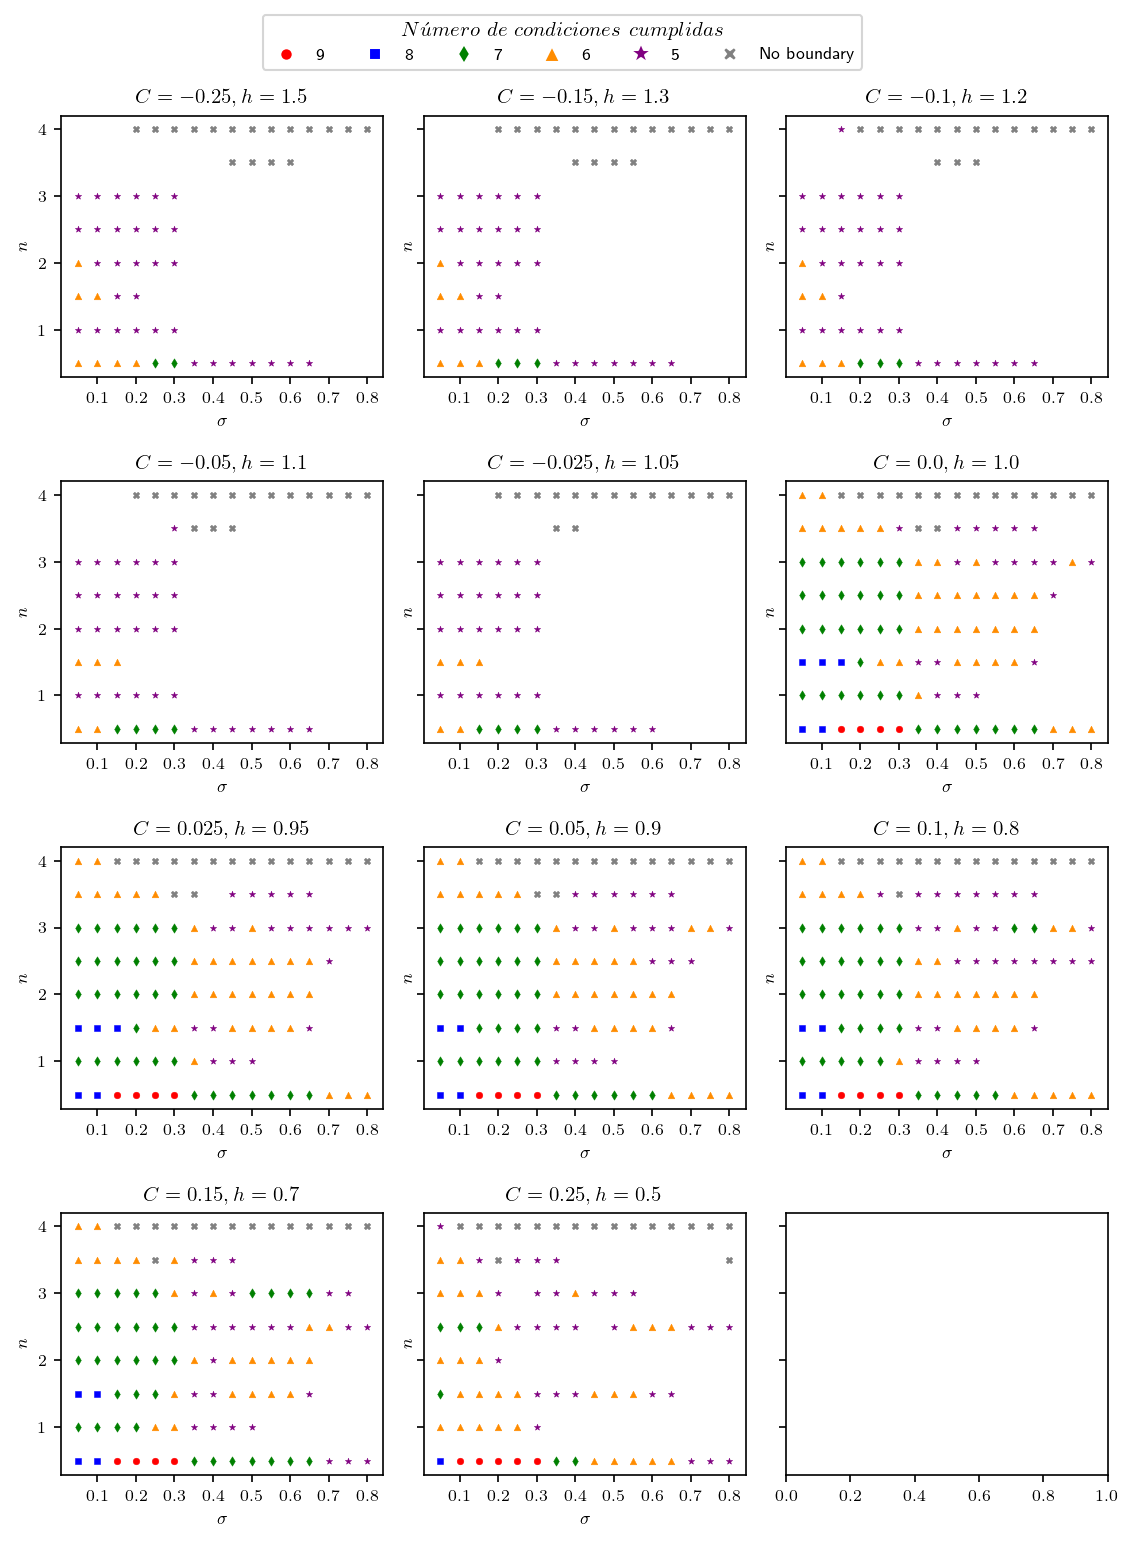

In [11]:
cols = 3 
rows = (len(Lista_C)//cols + 1) if (len(Lista_C)%cols) != 0 else (len(Lista_C)//cols)

fig, axs = plt.subplots(nrows=rows, ncols=cols, sharey=True, figsize=(3*cols,3*rows),dpi=150)    
    

for m in range(cols):
    
    for l in range(rows):
                
        for j in range(len(Lista_n)):
            
            for k in range(len(Lista_sigma)):
                
                if 3*l+m < len(Lista_C):
                    
                    axs[l,m].scatter(Lista_sigma[k],Lista_n[j],c=C[3*l+m][j][k][0],marker=C[3*l+m][j][k][1],s=10,
                                     edgecolors=C[3*l+m][j][k][0],linewidths=0.25)
                    
                    axs[l,m].set_xlabel(r'$\sigma$',fontsize=8)
                    axs[l,m].set_ylabel(r'$n$',fontsize=8)
                    axs[l,m].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
                    axs[l,m].set_yticks([1.0,2.0,3.0,4.0])
                    axs[l,m].set_title(r'$C = {}, h = {}$'.format(Lista_C[3*l+m],1-2*Lista_C[3*l+m]),
                                       x=0.5,y=1.0,fontsize=10)
                else:
                     break
                        
fig.subplots_adjust(wspace=0.125,hspace=0.4)
Legend = axs[0,1].legend(handles=legend_elements,title=r'$N\acute{u}mero$ $de$ $condiciones$ $cumplidas$',
                        ncol=6,loc=(-0.5,1.175),fontsize=8)
plt.setp(Legend.get_title(),fontsize='medium')
plt.show()

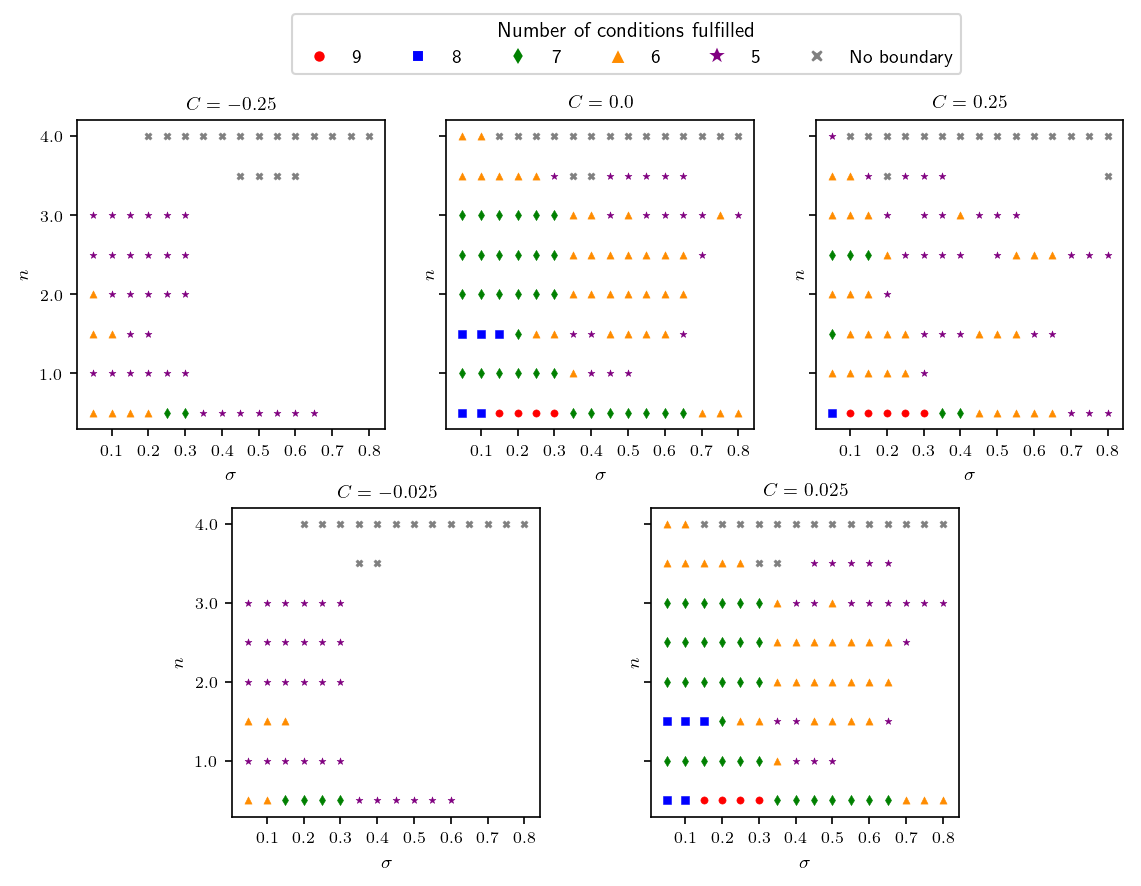

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(9,6),dpi=150)

for j in range(len(Lista_n)):
    
    for k in range(len(Lista_sigma)):
        
        axs[0,0].scatter(Lista_sigma[k],Lista_n[j],c=C[0][j][k][0],marker=C[0][j][k][1],s=12,
                   edgecolors=C[0][j][k][0],linewidths=0.25)
        axs[0,1].scatter(Lista_sigma[k],Lista_n[j],c=C[5][j][k][0],marker=C[5][j][k][1],s=12,
                   edgecolors=C[5][j][k][0],linewidths=0.25)
        axs[0,2].scatter(Lista_sigma[k],Lista_n[j],c=C[10][j][k][0],marker=C[10][j][k][1],s=12,
                   edgecolors=C[10][j][k][0],linewidths=0.25)
        axs[1,0].scatter(Lista_sigma[k],Lista_n[j],c=C[4][j][k][0],marker=C[4][j][k][1],s=12,
                   edgecolors=C[4][j][k][0],linewidths=0.25)
        axs[1,1].scatter(Lista_sigma[k],Lista_n[j],c=C[6][j][k][0],marker=C[6][j][k][1],s=12,
                   edgecolors=C[6][j][k][0],linewidths=0.25)
        axs[1,2].set_visible(False)
        
        axs[1,0].set_position([0.24,0.10625,0.228,0.343])
        axs[1,1].set_position([0.55,0.10625,0.228,0.343])
        
        axs[0,0].set_xlabel(r'$\sigma$',fontsize=9)
        axs[0,0].set_ylabel(r'$n$',fontsize=9)
        axs[0,0].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
        axs[0,0].set_yticks([1.0,2.0,3.0,4.0])
        axs[0,0].set_title(r'$C = {}$'.format(Lista_C[0]),
                           x=0.5,y=1.0,fontsize=9)
        axs[0,0].set_yticklabels([r'$1.0$',r'$2.0$',r'$3.0$',r'$4.0$'])
        
        axs[0,1].set_xlabel(r'$\sigma$',fontsize=9)
        axs[0,1].set_ylabel(r'$n$',fontsize=9)
        axs[0,1].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
        axs[0,1].set_yticks([1.0,2.0,3.0,4.0])
        axs[0,1].set_title(r'$C = {}$'.format(Lista_C[5]),
                           x=0.5,y=1.0,fontsize=9)
        
        axs[0,2].set_xlabel(r'$\sigma$',fontsize=9)
        axs[0,2].set_ylabel(r'$n$',fontsize=9)
        axs[0,2].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
        axs[0,2].set_yticks([1.0,2.0,3.0,4.0])
        axs[0,2].set_title(r'$C = {}$'.format(Lista_C[10]),
                           x=0.5,y=1.0,fontsize=9)
        
        axs[1,0].set_xlabel(r'$\sigma$',fontsize=9)
        axs[1,0].set_ylabel(r'$n$',fontsize=9)
        axs[1,0].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
        axs[1,0].set_yticks([1.0,2.0,3.0,4.0])
        axs[1,0].set_title(r'$C = {}$'.format(Lista_C[4]),
                           x=0.5,y=1.0,fontsize=9)
        
        axs[1,1].set_xlabel(r'$\sigma$',fontsize=9)
        axs[1,1].set_ylabel(r'$n$',fontsize=9)
        axs[1,1].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
        axs[1,1].set_yticks([1.0,2.0,3.0,4.0])
        axs[1,1].set_title(r'$C = {}$'.format(Lista_C[6]),
                           x=0.5,y=1.0,fontsize=9)
        
Legend = axs[0,1].legend(handles=legend_elements,title='Number of conditions fulfilled',
                    ncol=6,loc=(-0.5,1.15),fontsize=9)
# plt.setp(Legend.get_title(),fontsize='medium')
plt.show()

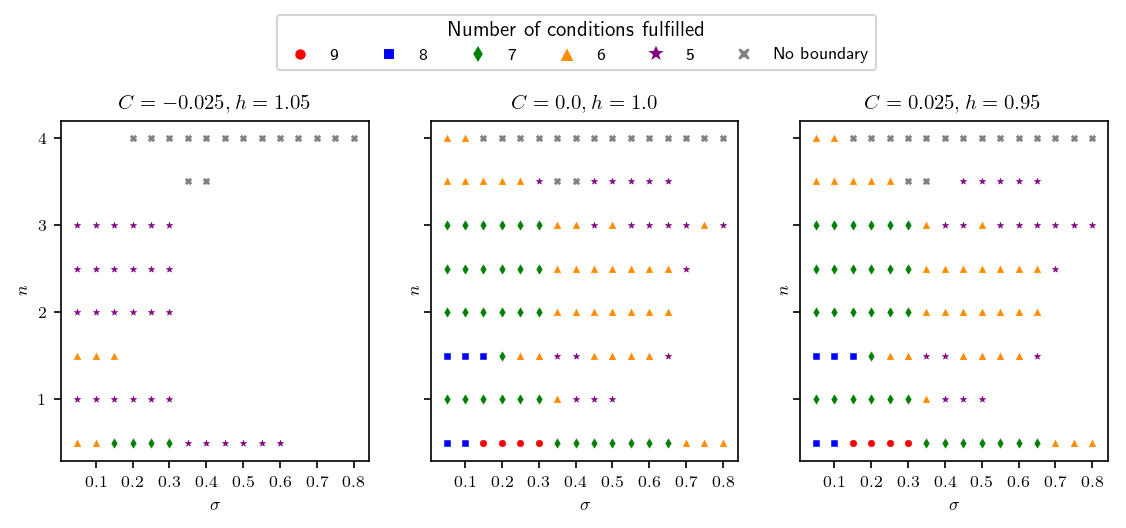

In [13]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(9,3),dpi=150)

for j in range(len(Lista_n)):
    
    for k in range(len(Lista_sigma)):
        
        ax1.scatter(Lista_sigma[k],Lista_n[j],c=C[4][j][k][0],marker=C[4][j][k][1],s=10,
                   edgecolors=C[4][j][k][0],linewidths=0.25)
        ax2.scatter(Lista_sigma[k],Lista_n[j],c=C[5][j][k][0],marker=C[5][j][k][1],s=10,
                   edgecolors=C[5][j][k][0],linewidths=0.25)
        ax3.scatter(Lista_sigma[k],Lista_n[j],c=C[6][j][k][0],marker=C[6][j][k][1],s=10,
                   edgecolors=C[6][j][k][0],linewidths=0.25)
        
        ax1.set_xlabel(r'$\sigma$',fontsize=8)
        ax1.set_ylabel(r'$n$',fontsize=8)
        ax1.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
        ax1.set_yticks([1.0,2.0,3.0,4.0])
        ax1.set_title(r'$C = {}, h = {}$'.format(Lista_C[4],1-2*Lista_C[4]),
                           x=0.5,y=1.0,fontsize=10)
        
        ax2.set_xlabel(r'$\sigma$',fontsize=8)
        ax2.set_ylabel(r'$n$',fontsize=8)
        ax2.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
        ax2.set_yticks([1.0,2.0,3.0,4.0])
        ax2.set_title(r'$C = {}, h = {}$'.format(Lista_C[5],1-2*Lista_C[5]),
                           x=0.5,y=1.0,fontsize=10)
        
        ax3.set_xlabel(r'$\sigma$',fontsize=8)
        ax3.set_ylabel(r'$n$',fontsize=8)
        ax3.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
        ax3.set_yticks([1.0,2.0,3.0,4.0])
        ax3.set_title(r'$C = {}, h = {}$'.format(Lista_C[6],1-2*Lista_C[6]),
                           x=0.5,y=1.0,fontsize=10)
        
# Legend = ax2.legend(handles=legend_elements,title=r'$N\acute{u}mero$ $de$ $condiciones$ $cumplidas$',
#                     ncol=6,loc=(-0.5,1.15),fontsize=8)
Legend = ax2.legend(handles=legend_elements,title='Number of conditions fulfilled',
                    ncol=6,loc=(-0.5,1.15),fontsize=8)
plt.setp(Legend.get_title(),fontsize='medium')
plt.show()

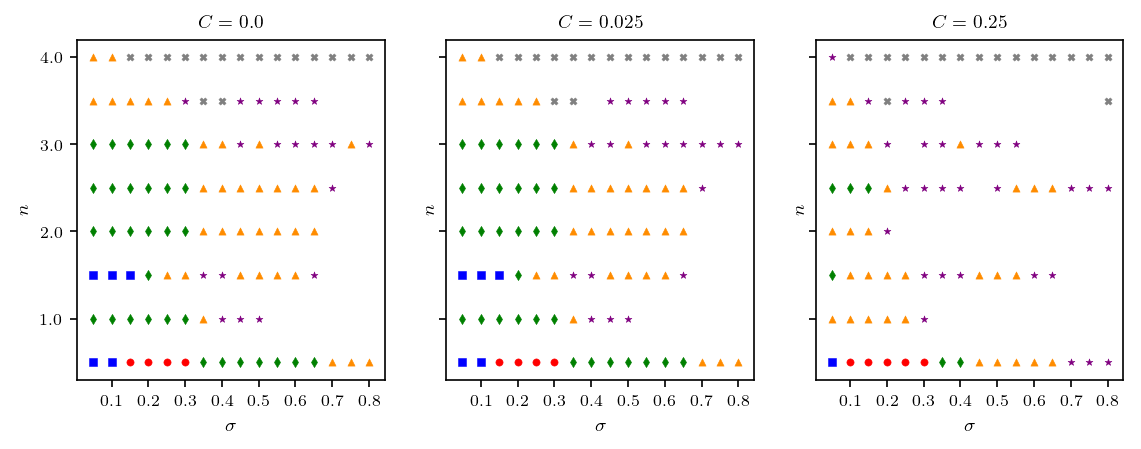

In [14]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(9,3),dpi=150)

for j in range(len(Lista_n)):
    
    for k in range(len(Lista_sigma)):
        
        ax1.scatter(Lista_sigma[k],Lista_n[j],c=C[5][j][k][0],marker=C[5][j][k][1],s=12,
                   edgecolors=C[5][j][k][0],linewidths=0.25)
        ax2.scatter(Lista_sigma[k],Lista_n[j],c=C[6][j][k][0],marker=C[6][j][k][1],s=12,
                   edgecolors=C[6][j][k][0],linewidths=0.25)
        ax3.scatter(Lista_sigma[k],Lista_n[j],c=C[10][j][k][0],marker=C[10][j][k][1],s=12,
                   edgecolors=C[10][j][k][0],linewidths=0.25)
        
        ax1.set_xlabel(r'$\sigma$',fontsize=9)
        ax1.set_ylabel(r'$n$',fontsize=9)
        ax1.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
        ax1.set_yticks([1.0,2.0,3.0,4.0])
        ax1.set_title(r'$C = {}$'.format(Lista_C[5]),
                           x=0.5,y=1.0,fontsize=9)
        ax1.set_yticklabels([r'$1.0$',r'$2.0$',r'$3.0$',r'$4.0$'])
        
        ax2.set_xlabel(r'$\sigma$',fontsize=9)
        ax2.set_ylabel(r'$n$',fontsize=9)
        ax2.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
        ax2.set_yticks([1.0,2.0,3.0,4.0])
        ax2.set_title(r'$C = {}$'.format(Lista_C[6]),
                           x=0.5,y=1.0,fontsize=9)
        
        ax3.set_xlabel(r'$\sigma$',fontsize=9)
        ax3.set_ylabel(r'$n$',fontsize=9)
        ax3.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
        ax3.set_yticks([1.0,2.0,3.0,4.0])
        ax3.set_title(r'$C = {}$'.format(Lista_C[10]),
                           x=0.5,y=1.0,fontsize=9)
        
# Legend = ax2.legend(handles=legend_elements,title=r'$N\acute{u}mero$ $de$ $condiciones$ $cumplidas$',
#                     ncol=6,loc=(-0.5,1.125),fontsize=8)
# plt.setp(Legend.get_title(),fontsize='medium')
plt.show()

In [28]:
legend_elements = [Line2D([0],[0],marker='o',color='w',label='9',markerfacecolor='red',markersize=6),
                   Line2D([0],[0],marker='o',color='w',label='8',markerfacecolor='blue',markersize=6),
                   Line2D([0],[0],marker='o',color='w',label='7',markerfacecolor='green',markersize=6),
                   Line2D([0],[0],marker='o',color='w',label='6',markerfacecolor='darkorange',markersize=6),
                   Line2D([0],[0],marker='o',color='w',label='5',markerfacecolor='purple',markersize=6),
                   Line2D([0],[0],marker='o',color='w',label='Sin borde',markerfacecolor='gray',markersize=6)]

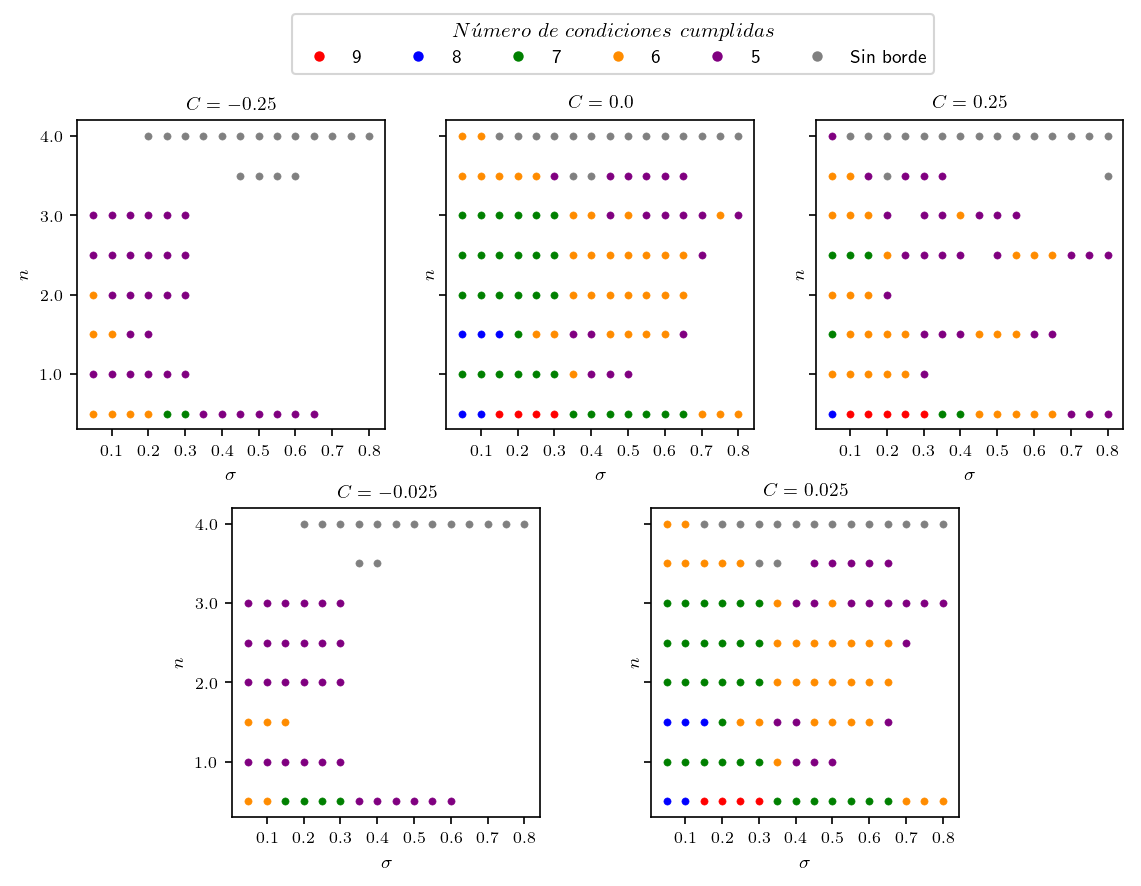

In [29]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(9,6),dpi=150)

for j in range(len(Lista_n)):
    
    for k in range(len(Lista_sigma)):
        
        axs[0,0].scatter(Lista_sigma[k],Lista_n[j],c=C[0][j][k][0],marker='o',s=12,
                   edgecolors=C[0][j][k][0],linewidths=0.25)
        axs[0,1].scatter(Lista_sigma[k],Lista_n[j],c=C[5][j][k][0],marker='o',s=12,
                   edgecolors=C[5][j][k][0],linewidths=0.25)
        axs[0,2].scatter(Lista_sigma[k],Lista_n[j],c=C[10][j][k][0],marker='o',s=12,
                   edgecolors=C[10][j][k][0],linewidths=0.25)
        axs[1,0].scatter(Lista_sigma[k],Lista_n[j],c=C[4][j][k][0],marker='o',s=12,
                   edgecolors=C[4][j][k][0],linewidths=0.25)
        axs[1,1].scatter(Lista_sigma[k],Lista_n[j],c=C[6][j][k][0],marker='o',s=12,
                   edgecolors=C[6][j][k][0],linewidths=0.25)
        axs[1,2].set_visible(False)
        
        axs[1,0].set_position([0.24,0.10625,0.228,0.343])
        axs[1,1].set_position([0.55,0.10625,0.228,0.343])
        
        axs[0,0].set_xlabel(r'$\sigma$',fontsize=9)
        axs[0,0].set_ylabel(r'$n$',fontsize=9)
        axs[0,0].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
        axs[0,0].set_yticks([1.0,2.0,3.0,4.0])
        axs[0,0].set_title(r'$C = {}$'.format(Lista_C[0]),
                           x=0.5,y=1.0,fontsize=9)
        axs[0,0].set_yticklabels([r'$1.0$',r'$2.0$',r'$3.0$',r'$4.0$'])
        
        axs[0,1].set_xlabel(r'$\sigma$',fontsize=9)
        axs[0,1].set_ylabel(r'$n$',fontsize=9)
        axs[0,1].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
        axs[0,1].set_yticks([1.0,2.0,3.0,4.0])
        axs[0,1].set_title(r'$C = {}$'.format(Lista_C[5]),
                           x=0.5,y=1.0,fontsize=9)
        
        axs[0,2].set_xlabel(r'$\sigma$',fontsize=9)
        axs[0,2].set_ylabel(r'$n$',fontsize=9)
        axs[0,2].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
        axs[0,2].set_yticks([1.0,2.0,3.0,4.0])
        axs[0,2].set_title(r'$C = {}$'.format(Lista_C[10]),
                           x=0.5,y=1.0,fontsize=9)
        
        axs[1,0].set_xlabel(r'$\sigma$',fontsize=9)
        axs[1,0].set_ylabel(r'$n$',fontsize=9)
        axs[1,0].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
        axs[1,0].set_yticks([1.0,2.0,3.0,4.0])
        axs[1,0].set_title(r'$C = {}$'.format(Lista_C[4]),
                           x=0.5,y=1.0,fontsize=9)
        
        axs[1,1].set_xlabel(r'$\sigma$',fontsize=9)
        axs[1,1].set_ylabel(r'$n$',fontsize=9)
        axs[1,1].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
        axs[1,1].set_yticks([1.0,2.0,3.0,4.0])
        axs[1,1].set_title(r'$C = {}$'.format(Lista_C[6]),
                           x=0.5,y=1.0,fontsize=9)


Legend = axs[0,1].legend(handles=legend_elements,title=r'$N\acute{u}mero$ $de$ $condiciones$ $cumplidas$',ncol=6,loc=(-0.5,1.15),fontsize=9)
plt.setp(Legend.get_title(),fontsize='medium')

# Legend = axs[0,1].legend(handles=legend_elements,title='Number of conditions fulfilled',
#                     ncol=6,loc=(-0.5,1.15),fontsize=9)
# plt.setp(Legend.get_title(),fontsize='medium')
plt.show()